# Tourist satisfaction with transport systems to Mount Etna, Sicily. Part 2. Classification.

# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Academy/+ Papers/en_proceso/mount_etna/'


In [1]:
base_dir = '/mnt/g/My Drive/Academy/+ Papers/en_proceso/mount_etna/' # To run locally

# 1. Data pre-processing

In [2]:
#!pip install pycaret[full]

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import imblearn

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Libraries read!')

Libraries read!


## Reading data

In [4]:
lda_title_data_tuned = pd.read_csv(base_dir + 'data/car/lda_title_data_tuned.csv')
lda_review_data_tuned = pd.read_csv(base_dir + 'data/car/lda_review_data_tuned.csv')

# 5. Classification model

### Merging data

In [5]:
lda_title_data_tuned.head(15)

,Title_title,Title_sentiment_rating,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic
0,must see active volcano least life,0,0.789744,0.049322,0.160934,Topic_0,0.79
1,day trip,0,0.440206,0.130630,0.429163,Topic_0,0.44
2,cable car hike,0,0.083693,0.826061,0.090245,Topic_1,0.83
3,memorable,0,0.168423,0.168492,0.663085,Topic_2,0.66
4,need know,0,0.745830,0.112028,0.142142,Topic_0,0.75
5,favorite experience,0,0.112070,0.429435,0.458494,Topic_2,0.46
6,full trash,1,0.112161,0.112210,0.775629,Topic_2,0.78
7,NaN,0,0.333333,0.333333,0.333333,Topic_0,0.33
8,choose good tour company visit,0,0.056065,0.060306,0.883630,Topic_2,0.88
9,really cool experience,0,0.093445,0.511389,0.395166,Topic_1,0.51


In [6]:
lda_review_data_tuned.head(15)

,Review_content,Review_sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,extraordinary active volcano beautiful landsca...,0,0.006787,0.006894,0.986318,Topic_2,0.99
1,second visit immediately contact sabastiano li...,0,0.005327,0.005437,0.989237,Topic_2,0.99
2,cable ride catch terrain vehicle know price wa...,0,0.012921,0.081237,0.905842,Topic_2,0.91
3,life provide group special day touring freedom...,0,0.001855,0.996142,0.002003,Topic_1,1.00
4,drive early park big lot front restaurant stai...,0,0.004073,0.991801,0.004126,Topic_1,0.99
5,drive rent gp life much easy dress warm cold v...,0,0.001530,0.996904,0.001566,Topic_1,1.00
6,good way country national park take care drive...,1,0.006597,0.006644,0.986760,Topic_2,0.99
7,family use sicilylife stay port cruise port ti...,0,0.006109,0.005992,0.987899,Topic_2,0.99
8,careful choose company visit etna taxi driver ...,0,0.020171,0.114627,0.865203,Topic_2,0.87
9,pricey ride funicular halfway euro take wheel_...,0,0.642931,0.352912,0.004156,Topic_0,0.64


In [7]:
data = pd.concat([lda_title_data_tuned.drop(columns=['Title_sentiment_rating'], axis=1), lda_review_data_tuned], axis=1)
data = data.rename(columns={'Review_sentiment_rating': 'sentiment_rating'})
data = data.dropna(subset=['Title_title' ,'Review_content']).reset_index(drop=True)
data.head(15)

,Title_title,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic,Review_content,sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,must see active volcano least life,0.789744,0.049322,0.160934,Topic_0,0.79,extraordinary active volcano beautiful landsca...,0,0.006787,0.006894,0.986318,Topic_2,0.99
1,day trip,0.440206,0.130630,0.429163,Topic_0,0.44,second visit immediately contact sabastiano li...,0,0.005327,0.005437,0.989237,Topic_2,0.99
2,cable car hike,0.083693,0.826061,0.090245,Topic_1,0.83,cable ride catch terrain vehicle know price wa...,0,0.012921,0.081237,0.905842,Topic_2,0.91
3,memorable,0.168423,0.168492,0.663085,Topic_2,0.66,life provide group special day touring freedom...,0,0.001855,0.996142,0.002003,Topic_1,1.00
4,need know,0.745830,0.112028,0.142142,Topic_0,0.75,drive early park big lot front restaurant stai...,0,0.004073,0.991801,0.004126,Topic_1,0.99
5,favorite experience,0.112070,0.429435,0.458494,Topic_2,0.46,drive rent gp life much easy dress warm cold v...,0,0.001530,0.996904,0.001566,Topic_1,1.00
6,full trash,0.112161,0.112210,0.775629,Topic_2,0.78,good way country national park take care drive...,1,0.006597,0.006644,0.986760,Topic_2,0.99
7,choose good tour company visit,0.056065,0.060306,0.883630,Topic_2,0.88,careful choose company visit etna taxi driver ...,0,0.020171,0.114627,0.865203,Topic_2,0.87
8,really cool experience,0.093445,0.511389,0.395166,Topic_1,0.51,pricey ride funicular halfway euro take wheel_...,0,0.642931,0.352912,0.004156,Topic_0,0.64
9,go see,0.718194,0.162964,0.118843,Topic_0,0.72,terrible rent go yoursleve tell flier land rov...,0,0.956820,0.022522,0.020658,Topic_0,0.96


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title_title                 301 non-null    object 
 1   Title_Topic_0               301 non-null    float64
 2   Title_Topic_1               301 non-null    float64
 3   Title_Topic_2               301 non-null    float64
 4   Title_Dominant_Topic        301 non-null    object 
 5   Title_Perc_Dominant_Topic   301 non-null    float64
 6   Review_content              301 non-null    object 
 7   sentiment_rating            301 non-null    int64  
 8   Review_Topic_0              301 non-null    float64
 9   Review_Topic_1              301 non-null    float64
 10  Review_Topic_2              301 non-null    float64
 11  Review_Dominant_Topic       301 non-null    object 
 12  Review_Perc_Dominant_Topic  301 non-null    float64
dtypes: float64(8), int64(1), object(4)


In [9]:
from pycaret.classification import *

without_pca = setup(data = data, 
            target = 'sentiment_rating',
            session_id = 42,
            normalize = True,
            #normalize_method = 'minmax',
            transformation = True,
            #pca = True,
            ignore_features=['Title_title', 'Review_content', 'Title_Dominant_Topic', 'Title_Perc_Dominant_Topic', 
                             'Review_Dominant_Topic', 'Review_Perc_Dominant_Topic'],
            use_gpu = True,
            fix_imbalance=True,
            fix_imbalance_method=imblearn.over_sampling.SVMSMOTE(),
            data_split_stratify = True,
            fold_strategy = 'stratifiedkfold',
            silent = True,
            log_experiment = True,
            experiment_name = 'No pca, oversampling with SVMSMOTE'
           )

,Description,Value
0,session_id,42
1,Target,sentiment_rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(301, 13)"
5,Missing Values,0
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


eda(display_format = 'bokeh')

In [10]:
best_models = compare_models(turbo=False, exclude=['gpc', 'mlp', 'svm', 'ridge'], sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8190,0.6805,0.4500,0.1361,0.1986,0.1382,0.1745,0.0190
lr,Logistic Regression,0.8095,0.6518,0.4000,0.1111,0.1619,0.0976,0.1321,0.0230
nb,Naive Bayes,0.6714,0.5508,0.4000,0.0608,0.1026,0.0057,0.0339,0.0330
rbfsvm,SVM - Radial Kernel,0.8905,0.4718,0.2500,0.2167,0.1952,0.1645,0.1788,0.0430
knn,K Neighbors Classifier,0.8714,0.5308,0.1500,0.1333,0.1167,0.0751,0.0808,0.3950
qda,Quadratic Discriminant Analysis,0.8238,0.3432,0.1500,0.0583,0.0800,0.0189,0.0170,0.0250
et,Extra Trees Classifier,0.9143,0.5697,0.1000,0.0333,0.0500,0.0294,0.0375,0.6740
dt,Decision Tree Classifier,0.8238,0.4395,0.0000,0.0000,0.0000,-0.0704,-0.0816,0.0290
rf,Random Forest Classifier,0.9048,0.6179,0.0000,0.0000,0.0000,-0.0200,-0.0231,0.8180
ada,Ada Boost Classifier,0.8476,0.5087,0.0000,0.0000,0.0000,-0.0580,-0.0675,0.1440


!mlflow ui

## Linear Discriminant Analysis - LDA

In [11]:
# Best ML analysis
lda = create_model(estimator = 'lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.4500,0.0000,0.0000,0.0000,-0.0500,-0.0500
1,0.7619,1.0000,1.0000,0.1667,0.2857,0.2222,0.3536
2,0.7143,0.5500,0.0000,0.0000,0.0000,-0.0862,-0.1250
3,0.6190,0.8500,1.0000,0.1111,0.2000,0.1250,0.2582
4,0.8095,0.4500,0.0000,0.0000,0.0000,-0.0769,-0.0913
5,0.8571,0.4000,0.0000,0.0000,0.0000,-0.0678,-0.0725
6,0.9048,1.0000,1.0000,0.3333,0.5000,0.4615,0.5477
7,0.9048,0.3158,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8095,0.7895,0.5000,0.2500,0.3333,0.2364,0.2557
9,0.9048,1.0000,1.0000,0.5000,0.6667,0.6182,0.6689


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


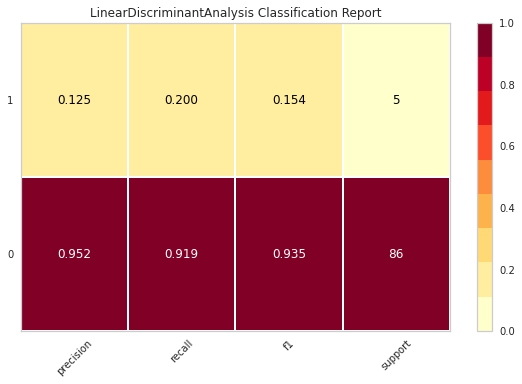

In [12]:
# Plotting the classification report
plot_model(estimator = lda, plot = 'class_report')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


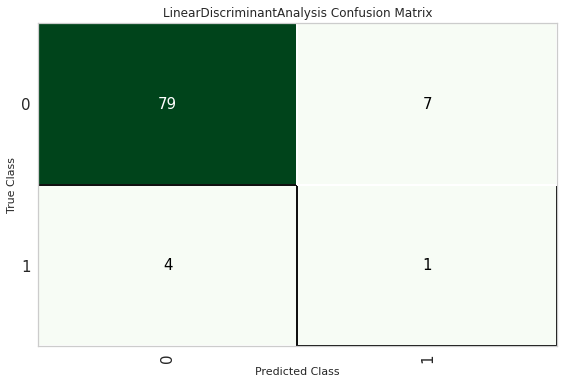

In [13]:
# Plotting the confusion matrix
plot_model(estimator = lda, plot = 'confusion_matrix')

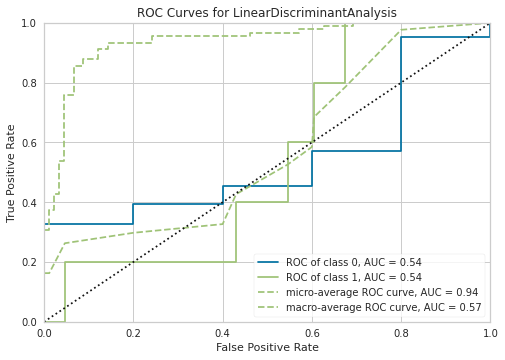

In [14]:
# Plotting the AUC
plot_model(estimator = lda, plot = 'auc')

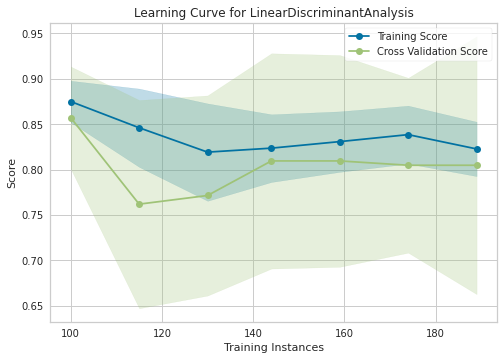

In [15]:
# Plotting the learning curve
plot_model(estimator = lda, plot = 'learning' )

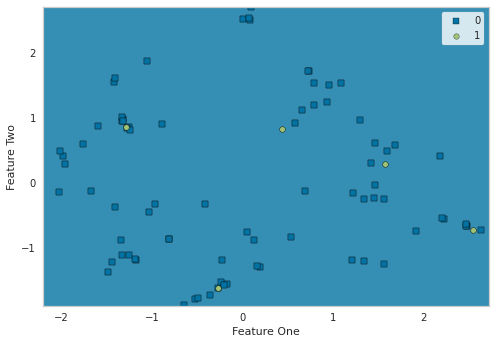

In [16]:
plot_model(estimator = lda, plot='boundary')

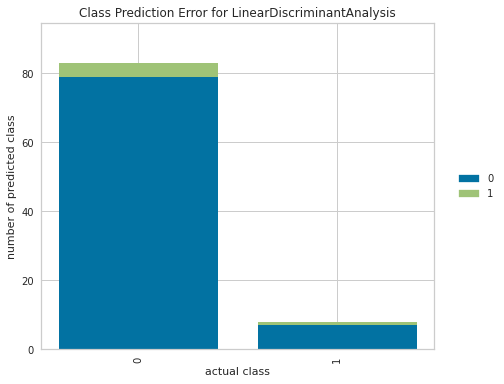

In [17]:
plot_model(estimator = lda, plot = 'error')

In [18]:
evaluate_model(estimator = lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## Tuned model: lda

In [19]:
# tune hyperparameters to optimize AUC
tuned_lda = tune_model(lda, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.4500,0.0000,0.0000,0.0000,-0.0500,-0.0500
1,0.7619,1.0000,1.0000,0.1667,0.2857,0.2222,0.3536
2,0.7143,0.5500,0.0000,0.0000,0.0000,-0.0862,-0.1250
3,0.6190,0.8500,1.0000,0.1111,0.2000,0.1250,0.2582
4,0.8095,0.4500,0.0000,0.0000,0.0000,-0.0769,-0.0913
5,0.8571,0.4000,0.0000,0.0000,0.0000,-0.0678,-0.0725
6,0.9048,1.0000,1.0000,0.3333,0.5000,0.4615,0.5477
7,0.9048,0.3158,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8095,0.7895,0.5000,0.2500,0.3333,0.2364,0.2557
9,0.9048,1.0000,1.0000,0.5000,0.6667,0.6182,0.6689


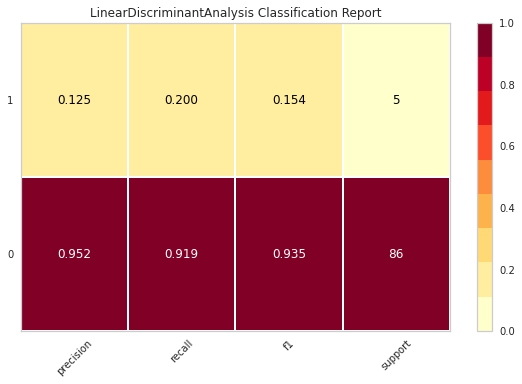

In [20]:
# Plotting the classification report
plot_model(estimator = tuned_lda, plot = 'class_report')

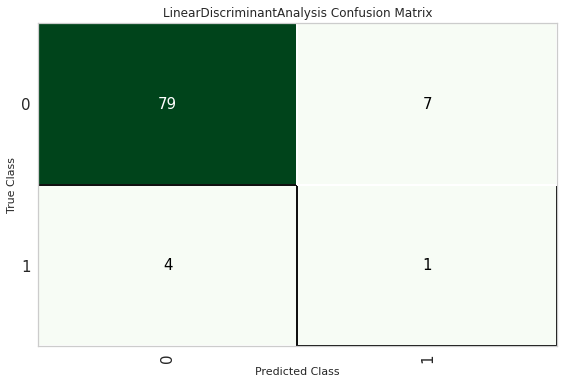

In [21]:
# Plotting the confusion matrix
plot_model(estimator = tuned_lda, plot = 'confusion_matrix')

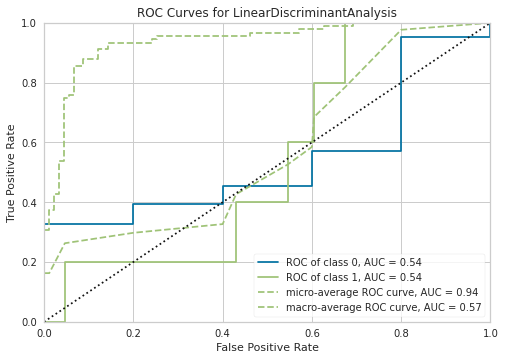

In [22]:
# Plotting the AUC
plot_model(estimator = tuned_lda, plot = 'auc')

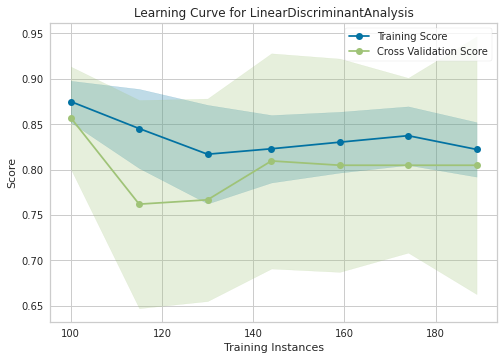

In [23]:
# Plotting the learning curve
plot_model(estimator = tuned_lda, plot = 'learning' )

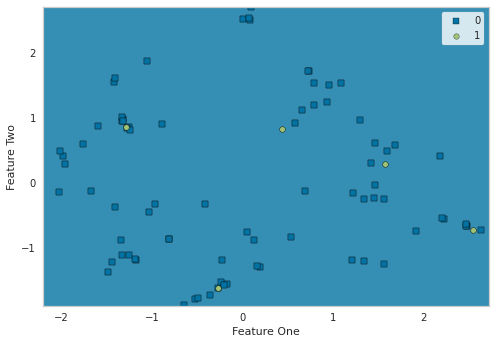

In [24]:
plot_model(estimator = tuned_lda, plot='boundary')

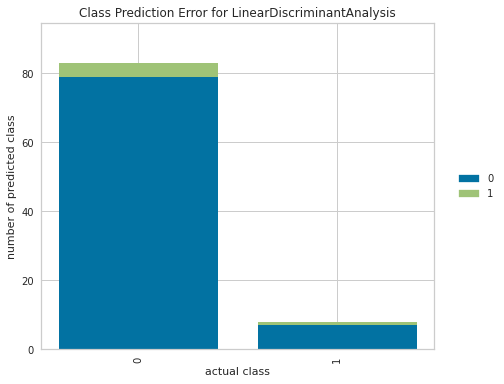

In [25]:
plot_model(estimator = tuned_lda, plot = 'error')

In [26]:
evaluate_model(estimator = tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## Logistic Regression

In [27]:
# Best ML analysis
lr = create_model(estimator = 'lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.4000,0.0000,0.0000,0.0000,-0.0500,-0.0500
1,0.7619,1.0000,1.0000,0.1667,0.2857,0.2222,0.3536
2,0.7143,0.6500,0.0000,0.0000,0.0000,-0.0862,-0.1250
3,0.6190,0.9000,1.0000,0.1111,0.2000,0.1250,0.2582
4,0.8095,0.3000,0.0000,0.0000,0.0000,-0.0769,-0.0913
5,0.8571,0.4000,0.0000,0.0000,0.0000,-0.0678,-0.0725
6,0.8571,1.0000,1.0000,0.2500,0.4000,0.3505,0.4610
7,0.9048,0.2368,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8095,0.7632,0.5000,0.2500,0.3333,0.2364,0.2557
9,0.8571,0.8684,0.5000,0.3333,0.4000,0.3226,0.3311


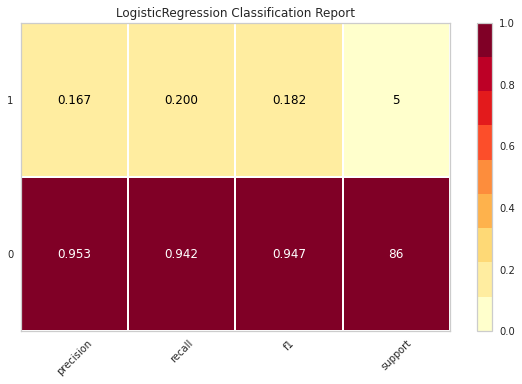

In [28]:
# Plotting the classification report
plot_model(estimator = lr, plot = 'class_report')

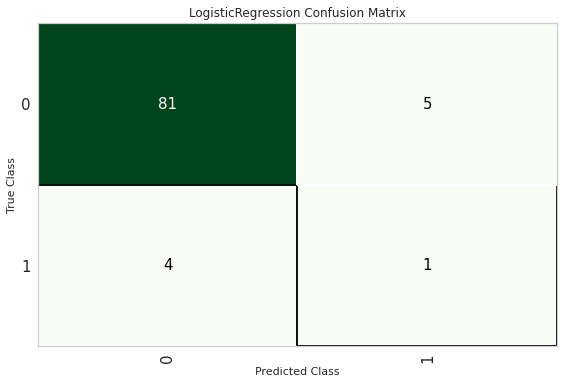

In [29]:
# Plotting the confusion matrix
plot_model(estimator = lr, plot = 'confusion_matrix')

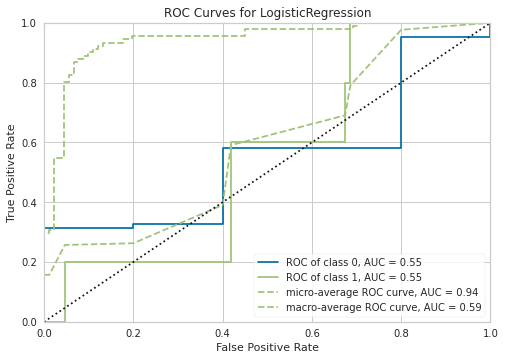

In [30]:
# Plotting the AUC
plot_model(estimator = lr, plot = 'auc')

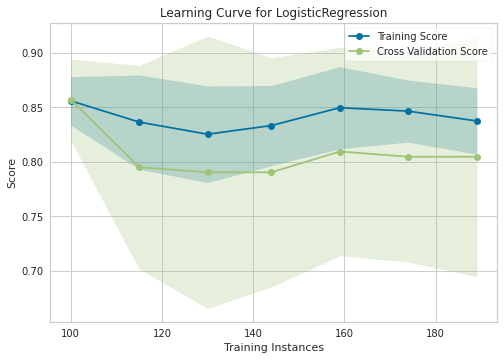

In [31]:
# Plotting the learning curve
plot_model(estimator = lr, plot = 'learning' )

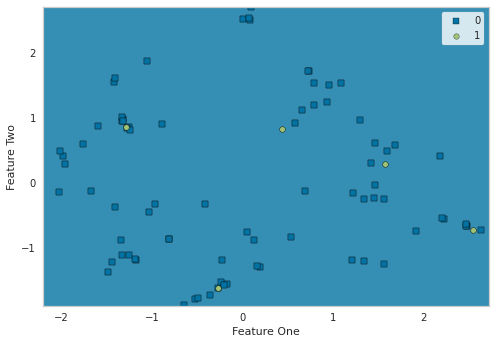

In [32]:
plot_model(estimator = lr, plot='boundary')

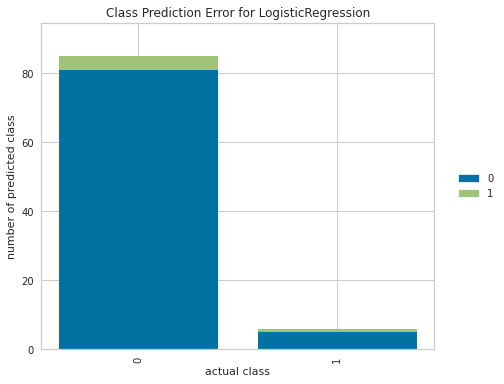

In [33]:
plot_model(estimator = lr, plot = 'error')

In [34]:
evaluate_model(estimator = lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: lr

In [35]:
# tune hyperparameters to optimize AUC
tuned_lr = tune_model(lr, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.2500,0.0000,0.0000,0.0000,-0.0825,-0.1085
1,0.7619,1.0000,1.0000,0.1667,0.2857,0.2222,0.3536
2,0.7143,0.5000,0.0000,0.0000,0.0000,-0.0862,-0.1250
3,0.4762,0.9000,1.0000,0.0833,0.1538,0.0723,0.1936
4,0.7619,0.3500,0.0000,0.0000,0.0000,-0.0825,-0.1085
5,0.8095,0.4500,0.0000,0.0000,0.0000,-0.0769,-0.0913
6,0.7619,1.0000,1.0000,0.1667,0.2857,0.2222,0.3536
7,0.9048,0.2368,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7143,0.7895,1.0000,0.2500,0.4000,0.2921,0.4136
9,0.7619,0.9211,1.0000,0.2857,0.4444,0.3478,0.4588


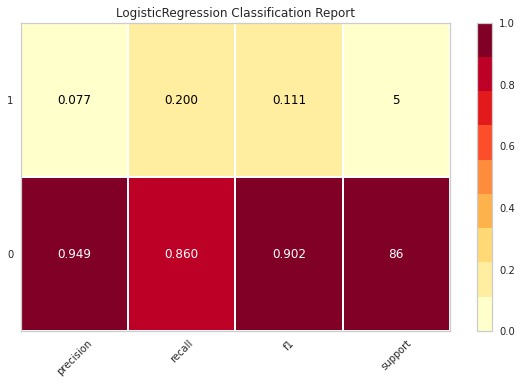

In [36]:
# Plotting the classification report
plot_model(estimator = tuned_lr, plot = 'class_report')

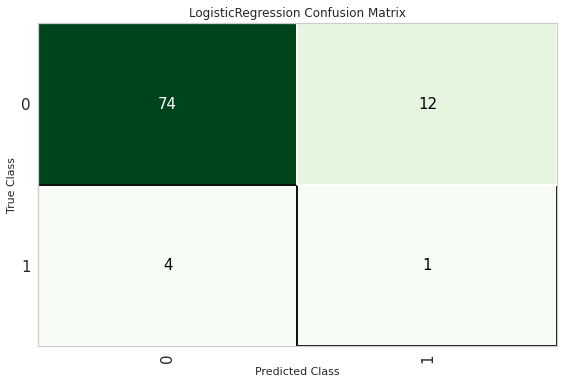

In [37]:
# Plotting the confusion matrix
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

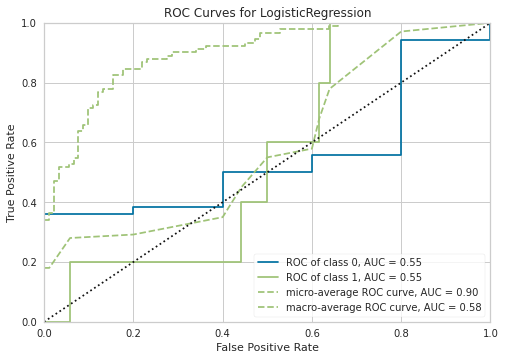

In [38]:
# Plotting the AUC
plot_model(estimator = tuned_lr, plot = 'auc')

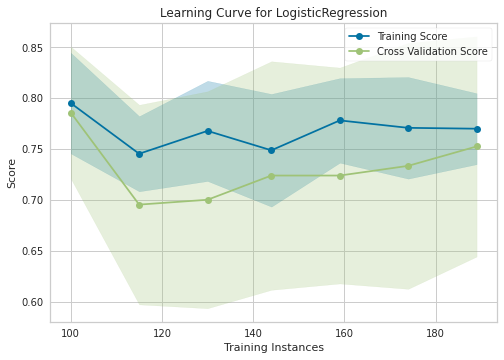

In [39]:
# Plotting the learning curve
plot_model(estimator = tuned_lr, plot = 'learning' )

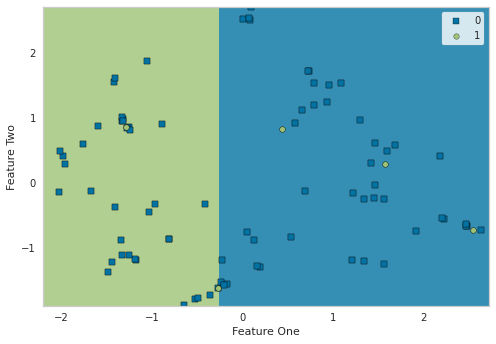

In [40]:
plot_model(estimator = tuned_lr, plot='boundary')

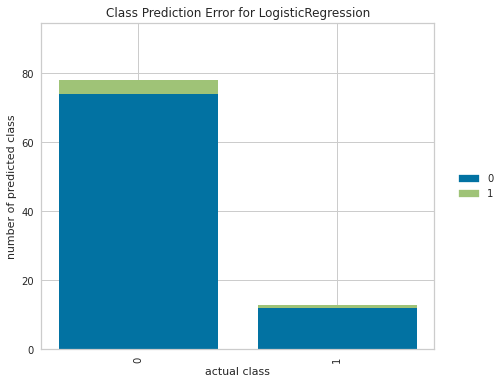

In [41]:
plot_model(estimator = tuned_lr, plot = 'error')

In [42]:
evaluate_model(estimator = tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Naive Bayes

In [43]:
# Best ML analysis
nb = create_model(estimator = 'nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.5000,0.0000,0.0000,0.0000,-0.0889,-0.1414
1,0.6190,0.9500,1.0000,0.1111,0.2000,0.1250,0.2582
2,0.6190,0.6500,1.0000,0.1111,0.2000,0.1250,0.2582
3,0.5714,0.9000,1.0000,0.1000,0.1818,0.1043,0.2345
4,0.7619,0.0000,0.0000,0.0000,0.0000,-0.0825,-0.1085
5,0.6667,0.4000,0.0000,0.0000,0.0000,-0.0889,-0.1414
6,0.6667,0.4500,0.0000,0.0000,0.0000,-0.0889,-0.1414
7,0.7619,0.2895,0.0000,0.0000,0.0000,-0.1290,-0.1325
8,0.6190,0.4737,0.0000,0.0000,0.0000,-0.1667,-0.2052
9,0.7619,0.8947,1.0000,0.2857,0.4444,0.3478,0.4588


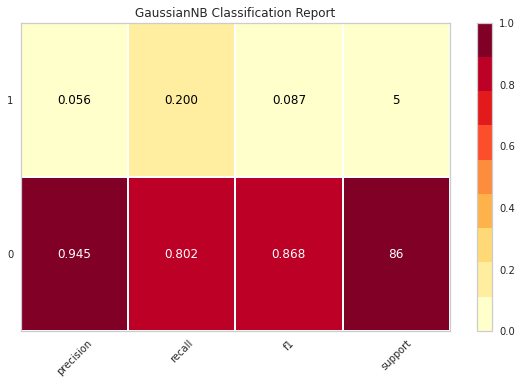

In [44]:
# Plotting the classification report
plot_model(estimator = nb, plot = 'class_report')

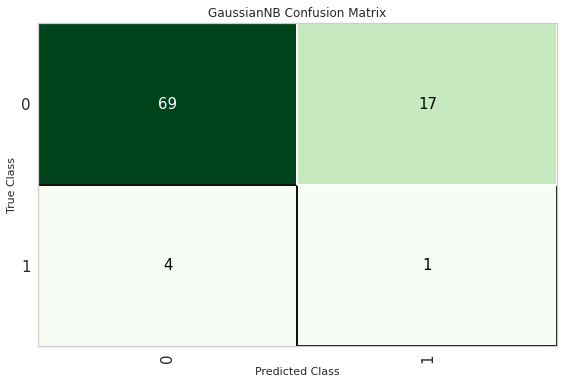

In [45]:
# Plotting the confusion matrix
plot_model(estimator = nb, plot = 'confusion_matrix')

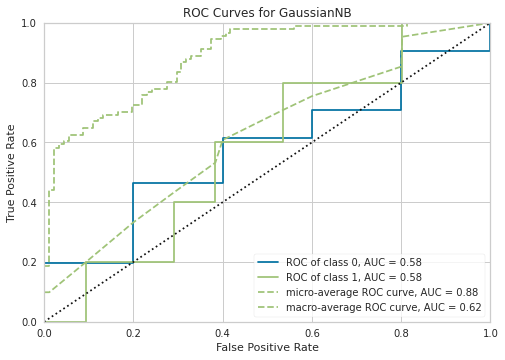

In [46]:
# Plotting the AUC
plot_model(estimator = nb, plot = 'auc')

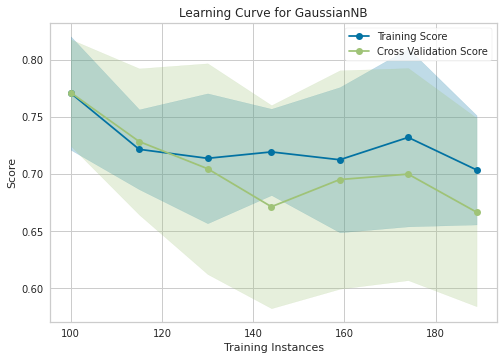

In [47]:
# Plotting the learning curve
plot_model(estimator = nb, plot = 'learning' )

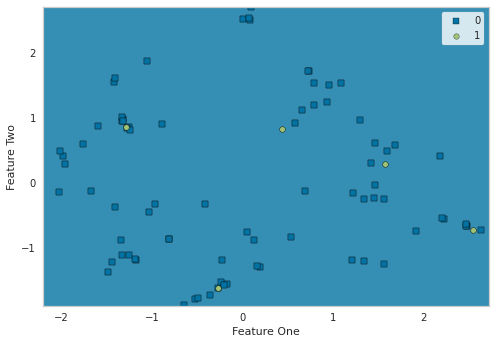

In [48]:
plot_model(estimator = nb, plot='boundary')

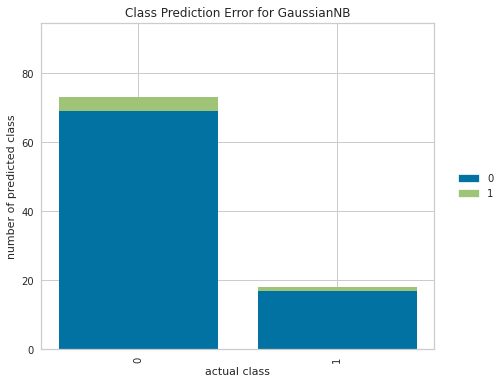

In [49]:
plot_model(estimator = nb, plot = 'error')

In [50]:
evaluate_model(estimator = nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## Tuned model: nb

In [51]:
# tune hyperparameters to optimize AUC
tuned_nb = tune_model(nb, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.5000,0.0000,0.0000,0.0000,-0.0889,-0.1414
1,0.6190,0.9500,1.0000,0.1111,0.2000,0.1250,0.2582
2,0.6190,0.6500,1.0000,0.1111,0.2000,0.1250,0.2582
3,0.5714,0.9000,1.0000,0.1000,0.1818,0.1043,0.2345
4,0.7619,0.0000,0.0000,0.0000,0.0000,-0.0825,-0.1085
5,0.6667,0.4000,0.0000,0.0000,0.0000,-0.0889,-0.1414
6,0.6667,0.4500,0.0000,0.0000,0.0000,-0.0889,-0.1414
7,0.7619,0.2895,0.0000,0.0000,0.0000,-0.1290,-0.1325
8,0.6190,0.4737,0.0000,0.0000,0.0000,-0.1667,-0.2052
9,0.7619,0.8947,1.0000,0.2857,0.4444,0.3478,0.4588


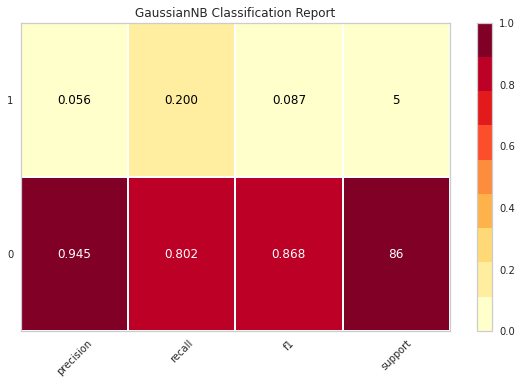

In [52]:
# Plotting the classification report
plot_model(estimator = tuned_nb, plot = 'class_report')

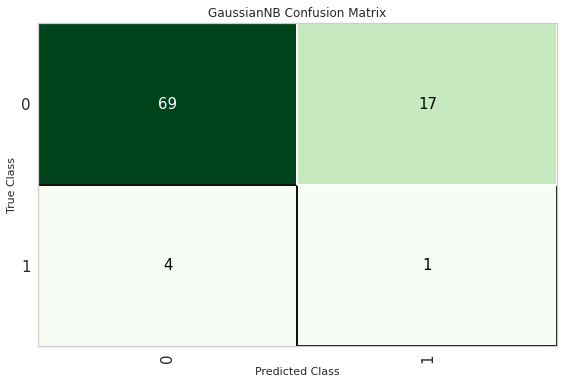

In [53]:
# Plotting the confusion matrix
plot_model(estimator = tuned_nb, plot = 'confusion_matrix')

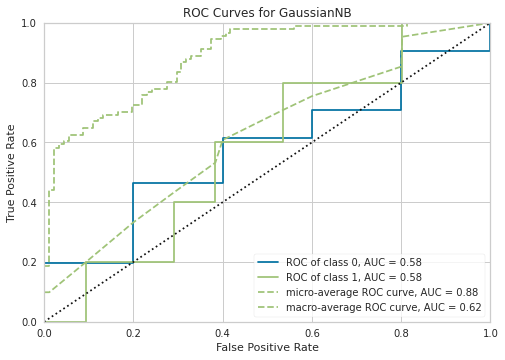

In [54]:
# Plotting the AUC
plot_model(estimator = tuned_nb, plot = 'auc')

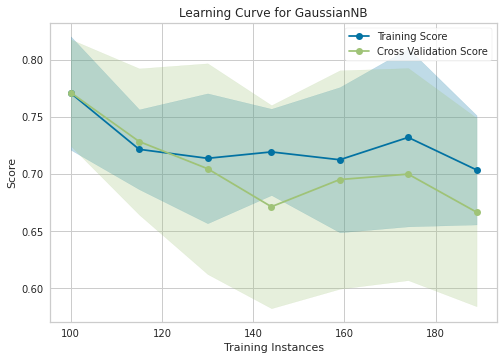

In [55]:
# Plotting the learning curve
plot_model(estimator = tuned_nb, plot = 'learning' )

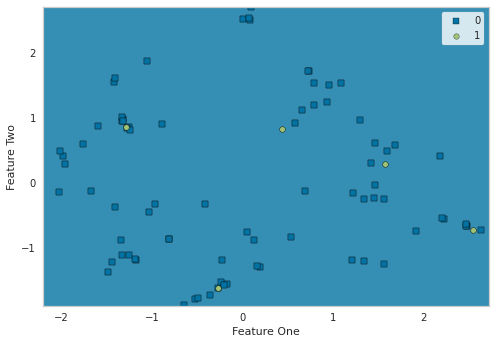

In [56]:
plot_model(estimator = tuned_nb, plot='boundary')

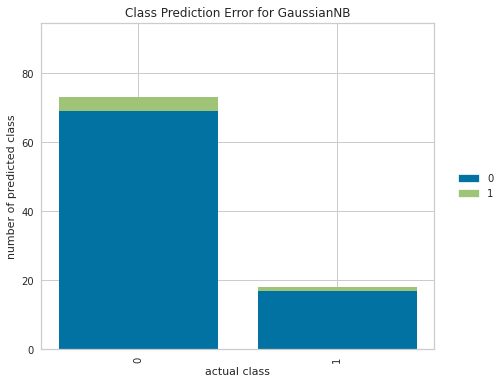

In [57]:
plot_model(estimator = tuned_nb, plot = 'error')

In [58]:
evaluate_model(estimator = tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

## Saving models

In [59]:
# finalize a model
final_lr = finalize_model(lr)

In [60]:
# save a model
save_model(final_lr, base_dir + 'models/car/lr')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Title_title',
                                                        'Review_content',
                                                        'Title_Dominant_Topic',
                                                        'Title_Perc_Dominant_Topic',
                                                        'Review_Dominant_Topic',
                                                        'Review_Perc_Dominant_Topic'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sentiment_rating',
                                       time...
                 ('feature_select', 'passthrough')

## Loading model

In [61]:
# Loading the saved model
lr_model = load_model(base_dir + 'models/car/lr')
lr_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Title_title',
                                                       'Review_content',
                                                       'Title_Dominant_Topic',
                                                       'Title_Perc_Dominant_Topic',
                                                       'Review_Dominant_Topic',
                                                       'Review_Perc_Dominant_Topic'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='sentiment_rating',
                                      time...
                ('feature_select', 'passthrough'), ('fix_multi', 